In [7]:
import matplotlib.pyplot as plt
import json
import os
import sys

In [14]:
def show_training(history):
    """
    Show loss and accuracies during training.

    Parameters:
        - history (dict):
            - loss (list[float]): Training losses.
            - train_acc (list[float]): Training accuracies.
            - val_acc (list[float]): Validation accuracies.

    """
    fig, (lhs, rhs) = plt.subplots(ncols=2, figsize=(12, 4))
    fig.suptitle('Training')

    # Set subplot titles.
    lhs.set_title('Loss')
    rhs.set_title('acc')

    # Set subplot axis labels.
    lhs.set_xlabel('epoch'), lhs.set_ylabel('loss')
    rhs.set_xlabel('epoch'), rhs.set_ylabel('acc')

    # Plot loss and accuracies.
    lhs.plot(history['loss'])
    rhs.plot(history['train_accuracy'], label='train')
    rhs.plot(history['val_accuracy'], label='val')
    rhs.legend()

    plt.show()

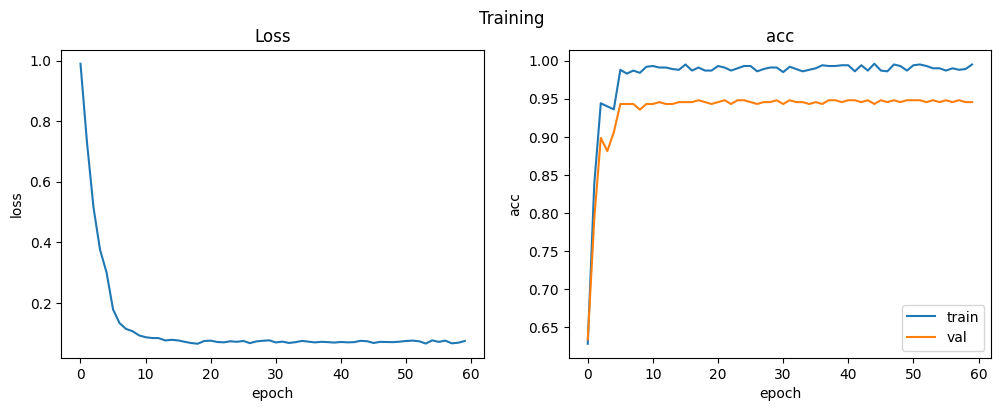

In [15]:
file_name = os.path.join(".", "detector.json")
with open(file_name, "r") as file:
    results = json.load(file)

show_training(results)

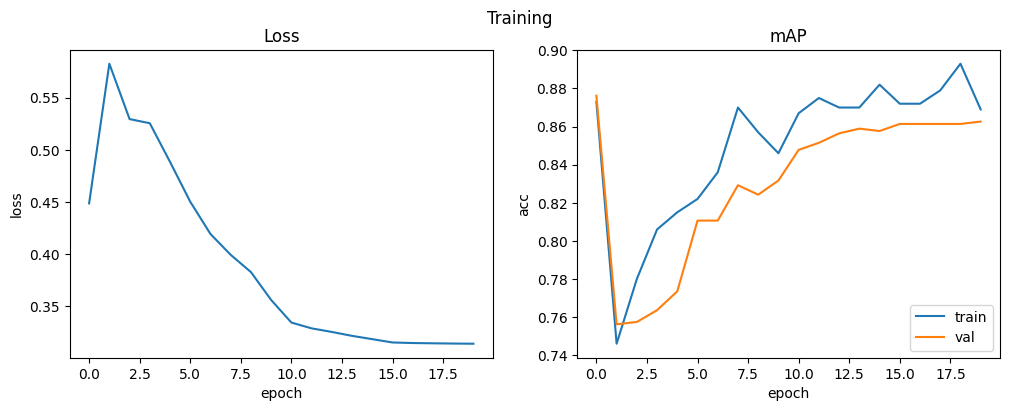

In [13]:
file_name = os.path.join("..", "detector_results", "detector.json")
with open(file_name, "r") as file:
    results = json.load(file)

show_training(results)

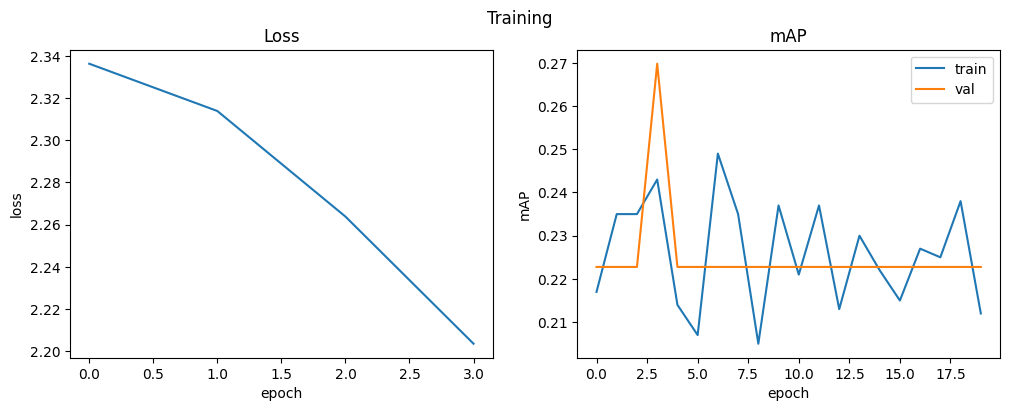

In [3]:
file_name = os.path.join(".", "cnn_trans_results.json")
with open(file_name, "r") as file:
    results = json.load(file)

show_training(results)

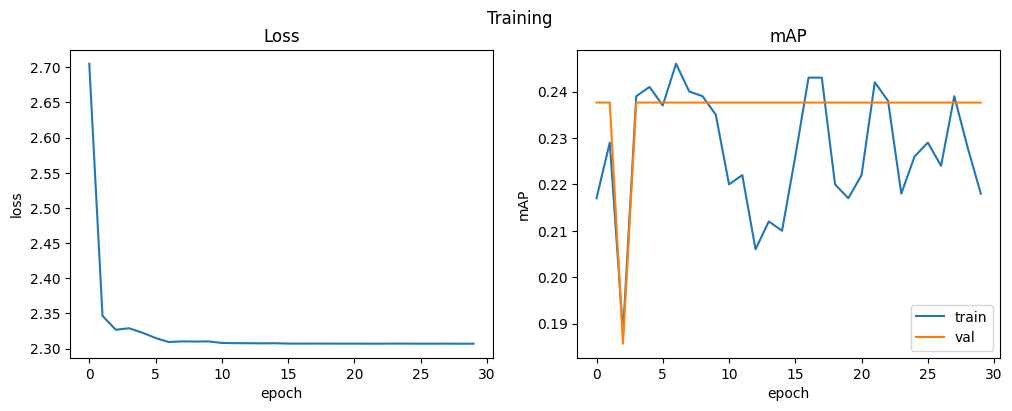

In [4]:
file_name = os.path.join(".", "3d_resnet_results.json")
with open(file_name, "r") as file:
    results = json.load(file)

show_training(results)

In [5]:
annot_train = os.path.join("D:", "IPN_Hand","annotations-20231128T085307Z-001", "annotations", "Annot_TrainList.txt")
annot_test = os.path.join("D:", "IPN_Hand","annotations-20231128T085307Z-001", "annotations", "Annot_TestList.txt")
hdf5_path = os.path.join("D:", "IPN_Hand", "hand_gestures.h5")

In [6]:
model_path = os.path.join(".", "detector_results", "resnetl_detector.pth")

In [7]:
model = resnetl10(num_classes = 2, sample_size = 128, sample_duration=60)

In [8]:
count_trainable_parameters(model)

913650

In [9]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [10]:
transform = transforms.Compose([
                transforms.ToTensor()
            ])
dataset = GestureDataset(hdf5_path, annot_test, transform, sample_duration=60)

In [11]:
label = dataset[1][1]

In [12]:
label

1

In [13]:
video = dataset[1][0]

In [14]:
video.shape

torch.Size([60, 3, 128, 128])

In [15]:
video_batch = video.unsqueeze(0).permute(0, 2, 1, 3, 4)


In [16]:
video_batch.shape

torch.Size([1, 3, 60, 128, 128])

In [17]:
output = model(video_batch)

In [18]:
output.shape

torch.Size([1, 2])

In [19]:
output

tensor([[-1.0687,  1.1612]], grad_fn=<AddmmBackward0>)

In [20]:
probs = F.softmax(output, dim=1)

In [21]:
probs

tensor([[0.0971, 0.9029]], grad_fn=<SoftmaxBackward0>)

In [22]:
index_of_correct_label = torch.argmax(probs, dim=1)

In [23]:
index_of_correct_label.item()

1

In [24]:
our_label = label

In [25]:
our_label

1

## Just to be clear

-   0 stands for no gestures
-   1 stands for gestures
